In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading csv file 
rental_df = pd.read_csv("CleanedData/cleaned_rental.csv")

#data set with changing rates
rental_df = pd.read_csv("CsvFiles/rental_rate.csv")
housing_df = pd.read_csv("CsvFiles/housing_rate.csv")
monthly_rental = pd.read_csv("RawData/Rental_price.csv")

In [4]:
#2018 rental price data
col2018 = ['City', 'State', '2018-01','2018-02', '2018-03', '2018-04',
       '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
       '2018-11', '2018-12']
rental2018 = rental_df[col2018]

#calculating yearly average of the rental price
rental2018["Yearly Average"]=rental2018.mean(axis=1)

#rearranging the columns 
order = ['City', 'State',"Yearly Average", '2018-01','2018-02', '2018-03', '2018-04',
       '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
       '2018-11', '2018-12']
rental2018 = rental2018[order]

#2019 rental price data
col2019 = ['City', 'State', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12']
rental2019 = rental_df[col2019]

#calculating the yarly average rental price in 2019
rental2019["Yearly Average"]=rental2019.mean(axis=1)

#rearranging the columns 
order = ['City', 'State','Yearly Average', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12']
rental2019 = rental2019[order]

#2020 rental price data
col2020 = ['City', 'State', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08']
rental2020 = rental_df[col2020]

#calculating the yarly average rental price in 2020
rental2020["Yearly Average"]=rental2020.mean(axis=1)

#rearranging the columns 
order = ['City', 'State', 'Yearly Average','2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08']
rental2020 = rental2020[order]

#calculating yearly changes 
City = rental_df["City"]
State = rental_df["State"]
Average2018 = rental2018['Yearly Average']
Average2019 = rental2019['Yearly Average']
Average2020 = rental2020['Yearly Average']

#combining the yearly average into one dataframe 
summary_df = pd.DataFrame({"City":City,"State":State,
                          "Average2018" : Average2018,
                          "Average2019" : Average2019,
                           "Average2020": Average2020})

#calcuatling yearly changing rate of rental price
summary_df["2018-2019 changing rate"]=''
summary_df["2019-2020 changing rate"]=''

for row in summary_df:
    rate_18 = ((summary_df['Average2019']- summary_df['Average2018'])/summary_df['Average2019'])*100
    summary_df['2018-2019 changing rate'] = rate_18
    rate_19 = ((summary_df['Average2020']- summary_df['Average2019'])/summary_df['Average2020'])*100
    summary_df['2019-2020 changing rate'] = rate_19
    
#exporting as csv file
summary_df.to_csv("CsvFiles/rental_rate.csv")



<ipython-input-4-57971585072d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental2018["Yearly Average"]=rental2018.mean(axis=1)
<ipython-input-4-57971585072d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental2019["Yearly Average"]=rental2019.mean(axis=1)
<ipython-input-4-57971585072d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [5]:
summary_df

,City,State,Average2018,Average2019,Average2020,2018-2019 changing rate,2019-2020 changing rate
0,New York,NY,2620.333333,2682.416667,2665.375,2.314455,-0.639372
1,Los Angeles,CA,2426.583333,2515.500000,2545.375,3.534751,1.173697
2,Chicago,IL,1721.000000,1762.916667,1774.875,2.377688,0.673756
3,Dallas,TX,1491.833333,1542.166667,1566.375,3.263806,1.545500
4,Philadelphia,PA,1527.833333,1578.500000,1607.000,3.209798,1.773491
...,...,...,...,...,...,...,...
100,Port St. Lucie,FL,1530.833333,1602.250000,1675.250,4.457274,4.357559
101,Fort Collins,CO,1566.916667,1619.166667,1647.250,3.226969,1.704862
102,Boulder,CO,1913.166667,1970.750000,1996.000,2.921899,1.265030
103,Greeley,CO,1601.500000,1663.000000,1691.375,3.698136,1.677629


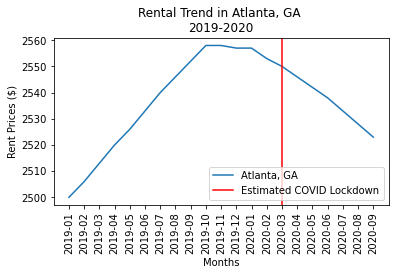

In [7]:
#plotting monthly rental prices in Atlanta from 2019 to 2020
Atlanta = monthly_rental.iloc[10,63:]

plt.title("Rental Trend in Atlanta, GA \n2019-2020")
plt.xlabel("Months")
plt.ylabel("Rent Prices ($)")

plt.xticks(rotation = 'vertical')
plt.plot(Atlanta, label="Atlanta, GA")
plt.gcf().subplots_adjust(bottom=0.3)

plt.axvline('2020-03', 0, 1, label='Estimated COVID Lockdown',color='r')
plt.legend()
plt.savefig('Output/Q4AtlantaRentTrend.png')

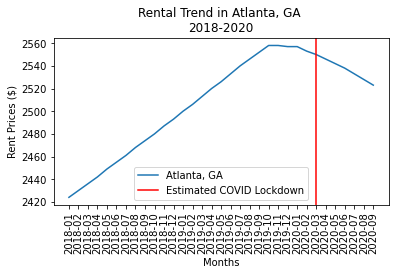

In [8]:
#plotting monthly rental prices in Atlanta from 2018 to 2020
Atlanta2 = monthly_rental.iloc[10,51:]
plt.title("Rental Trend in Atlanta, GA \n2018-2020")
plt.xlabel("Months")
plt.ylabel("Rent Prices ($)")

plt.xticks(rotation = 'vertical')
plt.plot(Atlanta2, label="Atlanta, GA")
plt.gcf().subplots_adjust(bottom=0.3)

plt.axvline('2020-03', 0, 1, label='Estimated COVID Lockdown',color='r')
plt.legend()
plt.savefig('Output/Q4AtlantaRentFullTrend.png')

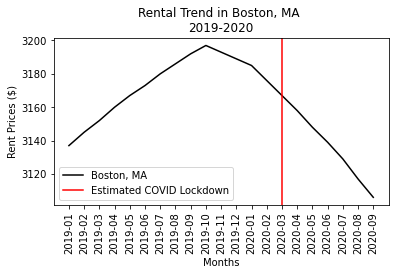

In [9]:
#plotting monthly rental prices in Boston from 2019 to 2020
Boston = monthly_rental.iloc[11,63:]
plt.title("Rental Trend in Boston, MA \n2019-2020")
plt.xlabel("Months")
plt.ylabel("Rent Prices ($)")

plt.xticks(rotation = 'vertical')
plt.plot(Boston, label="Boston, MA", color = 'black')
plt.gcf().subplots_adjust(bottom=0.3)

plt.axvline('2020-03', 0, 1, label='Estimated COVID Lockdown',color='r')
plt.legend()
plt.savefig('Output/Q4BostonRentTrend.png')

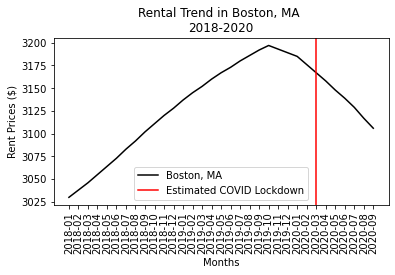

In [10]:
#plotting monthly rental prices in Boston from 2018 to 2020
Boston2 = monthly_rental.iloc[11,51:]

plt.title("Rental Trend in Boston, MA \n2018-2020")
plt.xlabel("Months")
plt.ylabel("Rent Prices ($)")

plt.xticks(rotation = 'vertical')
plt.plot(Boston2, label="Boston, MA", color = 'black')
plt.gcf().subplots_adjust(bottom=0.3)

plt.axvline('2020-03', 0, 1, label='Estimated COVID Lockdown',color='r')
plt.legend()

plt.savefig('Output/Q4BostonRentFullTrend.png')